In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_json('../raw_data/splits/train.json')

In [3]:
df.head()

,0000e73d-4d1e-4241-a577-88103fc0961c,000156fb-6f29-4057-b26f-eca7ce9e9460,00025400-f7bd-477b-9363-18defd2d5466,0006c590-29cd-4a3d-8d81-26023ac346a0,000b01ec-1bc7-4a3c-8599-0ad88fa654e3,000d4aa7-d24b-4c88-83b7-492d13eede7b,000f7fb4-0791-407a-8f6c-d4c932e42edd,0010d3dc-c59b-49f1-9766-4274b3a4ce96,00111391-e478-4ad6-9f29-f31362cdb497,001225c9-0747-49aa-bad8-5ed99f2b0c80,...,14ce36ec-427c-11ea-a6f9-887873dd81ef,14ce36ed-427c-11ea-8ab3-887873dd81ef,14ce36ee-427c-11ea-82b5-887873dd81ef,14ce36ef-427c-11ea-80a7-887873dd81ef,14ce36f0-427c-11ea-b887-887873dd81ef,14ce36f1-427c-11ea-871b-887873dd81ef,14ce36f2-427c-11ea-91d2-887873dd81ef,14ce36f3-427c-11ea-ab8b-887873dd81ef,14ce36f4-427c-11ea-a529-887873dd81ef,14ce36f5-427c-11ea-b737-887873dd81ef
author,"(Mayer, 1851)","(Hübner, 1806)","(Linnaeus, 1767)","(Rottemburg, 1775)","(Denis & Schiffermüller, 1775)","(Linnaeus, 1758)","Pagenstecher, 1908","(Prunner, 1798)","(Linnaeus, 1758)","(Esper, 1781)",...,"(Guérin-Méneville, 1849)","Ménétriés, 1857","(Pfeiffer, 1931)","Hübner,[1826]","(Herrich-Schäffer, [1843])","Bremer, 1864","Butler, 1868","(Gerhard, 1850)","(Klug, 1832)","(Staudinger, 1882)"
barcode,ETHZ-ENT0012714,ETHZ-ENT0015323,ETHZ-ENT0019906,ETHZ-ENT0013615,ETHZ-ENT0042254,ETHZ-ENT0004104,ETHZ-ENT0119814,ETHZ-ENT0011755,ETHZ-ENT0037829,ETHZ-ENT0011293,...,ETHZ-ENT0019978,ETHZ-ENT0012798,ETHZ-ENT0026306,ETHZ-ENT0032375,ETHZ-ENT0026280,ETHZ-ENT0012306,ETHZ-ENT0012301,ETHZ-ENT0013111,ETHZ-ENT0039040,ETHZ-ENT0012316
country,Switzerland,Switzerland,Morocco,Switzerland,Switzerland,Switzerland,France,Austria,Italy,Switzerland,...,Israel,Japan,Lebanon,Spain,Turkey,Russia,Spain,Turkey,Palestine,Tajikistan
dec_lat,46.31,46.76594,30.2804,47.37659,47.36836,46.24431,None,47.61806,43.866667,46.77242,...,None,None,None,None,None,None,None,None,None,None
dec_long,7.8,9.89316,-9.1599,7.740225,7.73113,8.79397,None,15.14222,7.666667,9.8493,...,None,None,None,None,None,None,None,None,None,None


In [4]:
def data_transformation(df):
    data = df.T
    data["path_to_image"]="../raw_data/IMG/"+data["image_name"]
    data['species'] = data['genus']+' '+data['specific_epithet'] 
    return data

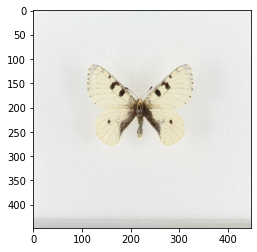

In [5]:
data = data_transformation(df)
img = Image.open(data["path_to_image"][100])
plt.imshow(img)

In [6]:
data_sample = data.sample(1000, random_state = 818)
data_sample.shape

(1000, 17)

In [7]:
# Créer un array avec les images
image = []
for i in data_sample['path_to_image'] :
    image.append(np.array(Image.open(i)))

In [8]:
image[0].shape

(448, 448, 3)

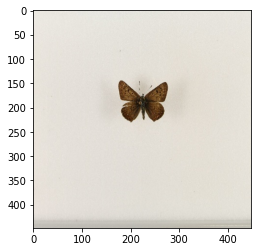

In [9]:
plt.imshow(image[0])

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    # $CHALLENGIFY_BEGIN
    model = VGG16(weights="imagenet", include_top=False, input_shape=image[0].shape)
    # $CHALLENGIFY_END
    
    return model

In [11]:
model = load_model()
model.summary()

2021-08-24 11:38:48.450710: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 112, 128)     0     

In [12]:
X = image
y = data_sample['species']

In [13]:
image

[array([[[236, 233, 226],
         [236, 233, 226],
         [236, 233, 226],
         ...,
         [229, 229, 221],
         [230, 230, 222],
         [234, 234, 226]],
 
        [[236, 233, 226],
         [239, 236, 229],
         [238, 235, 228],
         ...,
         [236, 236, 228],
         [228, 228, 220],
         [229, 229, 221]],
 
        [[237, 234, 227],
         [238, 235, 228],
         [238, 235, 228],
         ...,
         [234, 234, 226],
         [230, 230, 222],
         [232, 232, 224]],
 
        ...,
 
        [[196, 193, 188],
         [194, 191, 186],
         [197, 194, 189],
         ...,
         [192, 190, 178],
         [192, 190, 178],
         [192, 190, 178]],
 
        [[192, 189, 184],
         [193, 190, 185],
         [193, 190, 185],
         ...,
         [190, 190, 180],
         [190, 190, 180],
         [189, 189, 179]],
 
        [[190, 187, 182],
         [194, 191, 186],
         [191, 188, 183],
         ...,
         [190, 190, 180],
  

In [14]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

model
model = set_nontrainable_layers(model)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 112, 128)     0     

In [129]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(130, activation='relu')
    prediction_layer = layers.Dense(248, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [131]:
model = add_last_layers(model)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 3)                 64892691  
_________________________________________________________________
flatten_2 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               2000      
_________________________________________________________________
dense_5 (Dense)              (None, 248)               124248    
Total params: 65,018,939
Trainable params: 126,248
Non-trainable params: 64,892,691
_________________________________________________________________


In [132]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
    # $CHALLENGIFY_END

In [133]:
model = build_model()

In [49]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [21]:
len(X)

1000

In [50]:
from tensorflow.keras.backend import image_data_format

In [52]:
tf.keras.backend.image_data_format()

'channels_last'

In [54]:
tf.keras.backend.set_image_data_format('channels_last')

In [58]:
X[0].shape

(448, 448, 3)

In [59]:
len(X)

1000

In [109]:
df_train = data_transformation(pd.read_json('../raw_data/splits/train.json'))
df_val = data_transformation(pd.read_json('../raw_data/splits/val.json'))
df_test = data_transformation(pd.read_json('../raw_data/splits/test.json'))

In [110]:
def X_y_from_df(df, sample_size):
    data_sample = df.sample(sample_size, random_state = 818)
    image = []
    for i in data_sample['path_to_image'] :
        image.append(np.array(Image.open(i)))
    X = np.array(image)
    y = np.array(data_sample['species'])
    return X, y

In [111]:
X_val, y_val = X_y_from_df(df_val, 200)
X_test, y_test = X_y_from_df(df_test, 200)
X_train, y_train = X_y_from_df(data, 1000)

In [112]:
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [113]:
X_train.shape

(1000, 448, 448, 3)

In [114]:
X_val.shape

(200, 448, 448, 3)

In [115]:
y_train

array(['Lycaena tityrus', 'Clossiana titania', 'Argynnis paphia',
       'Nymphalis antiopa', 'Cupido minimus', 'Euphydryas cynthia',
       'Erebia aethiops', 'Thymelicus sylvestris', 'Melitaea didyma',
       'Coenonympha tullia', 'Aricia artaxerxes', 'Colias hyale',
       'Pieris bryoniae', 'Pieris bryoniae', 'Anthocharis cardamines',
       'Plebejus idas', 'Erebia triaria', 'Brenthis daphne',
       'Leptidea sinapis', 'Polyommatus dorylas', 'Plebejidea loewii',
       'Fabriciana adippe', 'Erebia meolans', 'Polyommatus icarus',
       'Lycaena virgaureae', 'Erebia mnestra', 'Plebejus idas',
       'Vanessa cardui', 'Boloria napaea', 'Lycaena virgaureae',
       'Parnassius mnemosyne', 'Plebejus idas', 'Araschnia levana',
       'Maniola jurtina', 'Colias alfacariensis', 'Melitaea aurelia',
       'Ochlodes venata', 'Maculinea teleius', 'Parnassius apollo',
       'Apatura ilia', 'Parnassius apollo', 'Pyrgus alveus',
       'Melanargia pherusa', 'Celastrina argiolus', 'Clossiana 

In [116]:
y_train.shape

(1000,)

In [117]:
y_val.shape

(200,)

In [118]:
y_val = y_val.reshape(200, 1)
y_train = y_train.reshape(1000, 1)

In [119]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
ohe.fit(y_train)
y_cat = ohe.transform(y_train)
y_val_cat = ohe.transform(y_val)

In [122]:
y_cat.shape

(1000, 248)

In [123]:
y_val_cat.shape

(200, 248)

In [127]:
X_train.shape

(1000, 448, 448, 3)

In [128]:
X_val.shape

(200, 448, 448, 3)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_cat, 
                    validation_data=(X_val, y_val_cat), 
                    epochs=50, 
                    batch_size=16, 
                    callbacks=[es])

Epoch 1/50
63/63 [==============================] - 5437s 87s/step - loss: 8.7197 - accuracy: 0.2330 - val_loss: 3.3747 - val_accuracy: 0.2700
Epoch 2/50
63/63 [==============================] - 1335s 21s/step - loss: 1.9244 - accuracy: 0.5990 - val_loss: 2.6198 - val_accuracy: 0.4000
Epoch 3/50
63/63 [==============================] - 1410s 22s/step - loss: 0.8630 - accuracy: 0.8150 - val_loss: 2.1492 - val_accuracy: 0.4650
Epoch 4/50
63/63 [==============================] - 1413s 23s/step - loss: 0.3397 - accuracy: 0.9280 - val_loss: 1.9587 - val_accuracy: 0.4950
Epoch 5/50
63/63 [==============================] - 1629s 26s/step - loss: 0.1414 - accuracy: 0.9660 - val_loss: 1.8511 - val_accuracy: 0.5050
Epoch 6/50
63/63 [==============================] - 1598s 25s/step - loss: 0.0563 - accuracy: 0.9910 - val_loss: 2.3679 - val_accuracy: 0.5500
Epoch 7/50
63/63 [==============================] - 1666s 27s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 2.3315 - val_accuracy: 0.5550